In [1]:
import pandas as pd

# Conversion rates used in this calculation (approximate, for current time)
KRW_to_TWD = 0.024  # 1 KRW = 0.024 TWD
# Data for conversion
him_data = {
    "2021": [699.95, 130.24, 6.39],
    "2022": [672.35, 208.48, 16.54],
    "2023": [635.78, 550.46, 12.28]
}

cube_data = {
    "2021": [32.14, 3.60],
    "2022": [60.09, 4.47],
    "2023": [80.65, 4.62]
}

jyp_data = {
    "2021": [189.35, 4.55],
    "2022": [314.99, 23.61, 7.29],
    "2023": [491.35, 60.91, 14.25]
}

hybe_data = {
    "2021": 699.55,
    "2022": 774.98,
    "2023": 980.30
}

sm_data = {
    "2021": 606.80,
    "2022": 728.39,
    "2023": 867.01
}

yg_data = {
    "2021": 356.85,
    "2022": 439.90,
    "2023": 653.38
}

In [2]:

# Convert KRW data to TWD
cube_twd = {year: sum(value * KRW_to_TWD * 1000 for value in data) for year, data in cube_data.items()}
jyp_twd = {year: sum(value * KRW_to_TWD * 1000 for value in data) for year, data in jyp_data.items()}
hybe_twd = {year: hybe_data[year] * KRW_to_TWD * 1000 for year in hybe_data}
sm_twd = {year: sm_data[year] * KRW_to_TWD * 1000 for year in sm_data}
him_twd = {year: sum(value for value in data) for year, data in him_data.items()} 
yg_twd = {year: yg_data[year] * KRW_to_TWD * 1000 for year in yg_data}

# Create a DataFrame
data_dict = {
    "Year": list(cube_twd.keys()),
    "HYBE (1M TWD)": list(hybe_twd.values()),
    "SM (1M TWD)": list(sm_twd.values()),
    "YG (1M TWD)": list(yg_twd.values()),
    "JYP (1M TWD)": list(jyp_twd.values()),
    "Cube (1M TWD)": list(cube_twd.values()),
    "HIM (1M TWD)": list(him_twd.values()),
}

df = pd.DataFrame(data_dict)

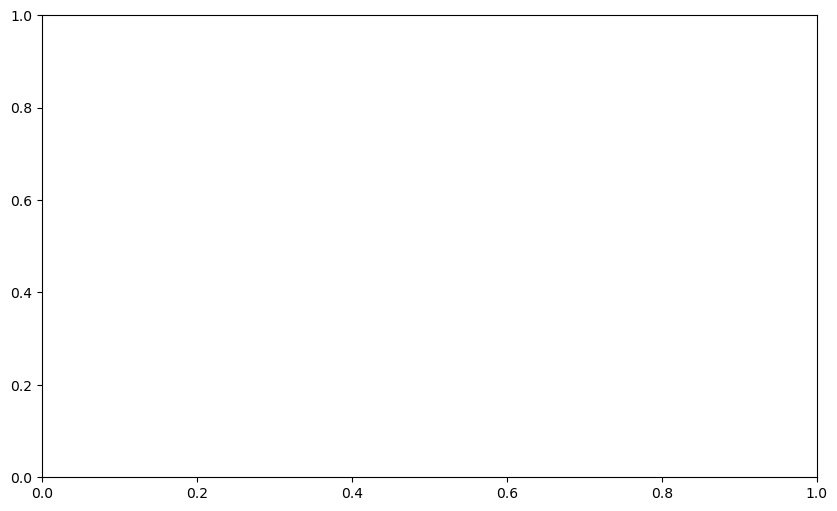

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

In [4]:
from matplotlib.animation import FuncAnimation
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 設定標楷體字體
font_path = 'C:/Windows/Fonts/msjh.ttc'  # Windows的標楷體路徑
font_prop = fm.FontProperties(fname=font_path)

# Create a DataFrame
data_dict = {
    "Year": list(cube_twd.keys()),
    "HYBE (1M TWD)": list(hybe_twd.values()),
    "SM (1M TWD)": list(sm_twd.values()),
    "YG (1M TWD)": list(yg_twd.values()),
    "JYP (1M TWD)": list(jyp_twd.values()),
    "Cube (1M TWD)": list(cube_twd.values()),
    "華研 (1M TWD)": list(him_twd.values()),
}

df = pd.DataFrame(data_dict)

# Convert Year to numeric
df['Year'] = pd.to_numeric(df['Year'])

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['royalblue', 'orange', 'tomato', 'mediumseagreen', 'violet', 'gold']
labels = ['HYBE (1M TWD)', 'SM (1M TWD)', 'YG (1M TWD)', 'JYP (1M TWD)', 'Cube (1M TWD)', '華研 (1M TWD)']

# Function to initialize the animation
def init():
    ax.clear()
    ax.set_title('Six Entertainment Companies Revenue Comparison (TWD in Millions)')
    ax.set_xlabel('Year')
    ax.set_ylabel('Revenue (TWD in Millions)')
    ax.set_xticks(df['Year'], fontsize=12)
    ax.grid(True)

# Animation function
def animate(i):
    ax.clear()
    init()
    for j in range(i + 1):
        ax.fill_between(df['Year'], df[labels[j]], label=labels[j], color=colors[j], alpha=0.7)

    ax.legend(loc='upper left', prop=font_prop)

# Create the animation
ani = FuncAnimation(fig, animate, frames=len(labels), init_func=init, repeat=False, interval=1000)

# Show the animation
plt.show()

ani.save('company_revenue_animation.gif', fps=1)
